In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import string 
from nltk.stem import WordNetLemmatizer
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

In [64]:
from google.colab import files
upload=files.upload() # LOADING DATA FROM OUR LOCAL MACHINE

Saving dataset1.csv to dataset1 (1).csv


In [78]:
# READING THE DATASET AND DISPLAYING ITS CONTENTS
df1 = pd.read_csv('dataset1 (1).csv', header=0)
df1.head()

,Tweet,Text Label,Label
0,".I just bought my cap and gown.', 'Yo this is ...",Non-Bullying,0
1,Dumbass is one word..,Non-Bullying,0
2,APPRECIATE THAT PERSON IN UR LIFE THAT STAYS W...,Non-Bullying,0
3,The *entire* discourse on the right has been v...,Non-Bullying,0
4,.My dumbass forgot my work uniform on my bed.....,Non-Bullying,0


In [79]:
df1.shape # DATASET SHAPE (No. OF ROWS AND COLUMNS)

(960, 3)

In [80]:
df1.info() # DATASET INFORMATION (DATA TYPE AND NULL COUNT)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet       960 non-null    object
 1   Text Label  960 non-null    object
 2   Label       960 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 22.6+ KB


In [81]:
print(df1)

                                                 Tweet    Text Label  Label
0    .I just bought my cap and gown.', 'Yo this is ...  Non-Bullying      0
1                                Dumbass is one word..  Non-Bullying      0
2    APPRECIATE THAT PERSON IN UR LIFE THAT STAYS W...  Non-Bullying      0
3    The *entire* discourse on the right has been v...  Non-Bullying      0
4    .My dumbass forgot my work uniform on my bed.....  Non-Bullying      0
..                                                 ...           ...    ...
955  No we are not, But you are a race baiting libt...      Bullying      1
956  you wont get anyone for this challenge., after...      Bullying      1
957  I will follow you if you are not a libtard,Mus...      Bullying      1
958  michaelianblack Ur a child, an ostrich w/ your...      Bullying      1
959  FoxNews. not to all the ppl I know that live t...      Bullying      1

[960 rows x 3 columns]


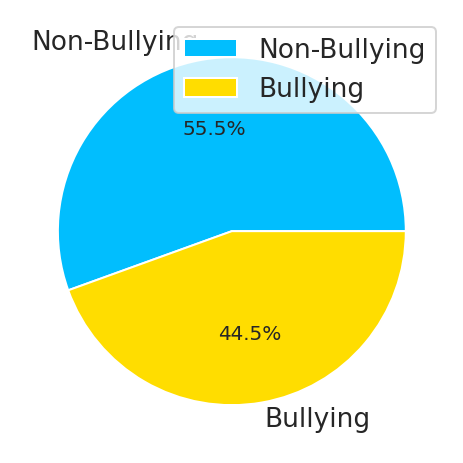

In [77]:
df1 = pd.DataFrame(df1['Text Label'].value_counts().reset_index())
plt.pie(data=df1,x='Text Label',labels='index', autopct='%.1f%%')
# plotting legend 
plt.legend()   
# showing the plot 
plt.show() 

In [82]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [83]:
Tweet = []
Labels = []

for row in df1["Tweet"]:
    #tokenize words
    words = word_tokenize(row)
    #remove punctuations
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    #remove stop words
    english_stops = set(stopwords.words('english'))
    characters_to_remove = ["''",'``',"rt","https","’","“","”","\u200b","--","n't","'s","...","//t.c" ]
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    #Lematise words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
    Tweet.append(lemma_list)

    for row in df1["Text Label"]:
        Labels.append(row)

In [84]:
#combine them to create bag of words
combined = zip(Tweet, Labels)

In [85]:
#Create bag of words and dictionary object
def bag_of_words(words):
    return dict([(word, True) for word in words])

In [86]:
#Key, Value Pair into new list for modeling
Final_Data = []
for r, v in combined:
    bag_of_words(r)
    Final_Data.append((bag_of_words(r),v))

In [87]:
#random shuffle
import random
random.shuffle(Final_Data)
print(len(Final_Data))

960


In [88]:
#Split the data into training set and testing 60/40 split
train_set, test_set = Final_Data[0:746], Final_Data[746:]

In [89]:
#import confusion matrix metrics and run Naive Bayes with Unigrams
import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics

In [90]:
#find accuracy
refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)


print("Naive Bayes Performance with Unigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Naive Bayes Performance with Unigrams 
Accuracy: 0.6682242990654206


In [91]:
#find recall
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)

nbrefset = collections.defaultdict(set)
nbtestset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    nbrefset[label].add(i)
    observed = nb_classifier.classify(feats)
    nbtestset[observed].add(i)
print("UnigramNB Recall")
print('Bullying recall:', recall(nbtestset['Bullying'], nbrefset['Bullying']))
print("")

UnigramNB Recall
Bullying recall: 0.6597938144329897



In [92]:
#find most informative features
classifier.show_most_informative_features(n=15)

Most Informative Features
                     low = True           Bullyi : Non-Bu =      8.1 : 1.0
                   piece = True           Bullyi : Non-Bu =      7.2 : 1.0
               worthless = True           Bullyi : Non-Bu =      6.1 : 1.0
                 someone = True           Non-Bu : Bullyi =      5.1 : 1.0
                    word = True           Bullyi : Non-Bu =      4.7 : 1.0
               prejudice = True           Non-Bu : Bullyi =      4.7 : 1.0
                      iq = True           Bullyi : Non-Bu =      4.6 : 1.0
                     day = True           Non-Bu : Bullyi =      4.4 : 1.0
                    fact = True           Non-Bu : Bullyi =      4.4 : 1.0
                   first = True           Non-Bu : Bullyi =      4.4 : 1.0
                feminism = True           Non-Bu : Bullyi =      4.4 : 1.0
                anything = True           Non-Bu : Bullyi =      4.4 : 1.0
                  retard = True           Bullyi : Non-Bu =      4.3 : 1.0

In [93]:
#Run Decision Tree for Unigrams to find recall

from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)
print("UnigramDT Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))
print("")

UnigramDT Recall
Bullying recall: 0.7560975609756098



In [94]:
#Run Maxent Classifier for Unigrams
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
print("UnigramsLogit Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))
print("")

UnigramsLogit Recall
Bullying recall: 0.6785714285714286



In [95]:
#Run Support Vector Machine for Unigrams
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)
    
print("UnigramSVM Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))

UnigramSVM Recall
Bullying recall: 0.6129032258064516


In [96]:
#Do the same thing with bigrams
from nltk import bigrams, trigrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [97]:
combined = zip(Tweet,Labels)

In [98]:
#Bag of words for bigrams
def bag_of_bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)  
    bigrams = bigram_finder.nbest(score_fn, n)  
    return bag_of_words(bigrams)


In [99]:
Final_Data2 =[]

for z, e in combined:
    bag_of_bigrams_words(z)
    Final_Data2.append((bag_of_bigrams_words(z),e))

In [100]:
import random
random.shuffle(Final_Data2)
print(len(Final_Data2))


960


In [101]:
#split data again around 60/40

train_set, test_set = Final_Data2[0:747], Final_Data2[747:]


In [102]:
#Naive Bayes for Bigrams
import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics



refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)
    

In [103]:
#Accuracy

print("Naive Bayes Performance with Bigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Naive Bayes Performance with Bigrams 
Accuracy: 0.6244131455399061


In [104]:
#Informative Features for Bigrams
classifier.show_most_informative_features(n=10)


Most Informative Features
       ('piece', 'shit') = True           Bullyi : Non-Bu =      9.4 : 1.0
           ('low', 'iq') = True           Bullyi : Non-Bu =      6.6 : 1.0
  ('worthless', 'piece') = True           Bullyi : Non-Bu =      5.9 : 1.0
        ('look', 'like') = True           Bullyi : Non-Bu =      4.7 : 1.0
   ('fucking', 'retard') = True           Bullyi : Non-Bu =      3.8 : 1.0
('theellenshow', '.kamalaharris') = True           Bullyi : Non-Bu =      2.1 : 1.0
     ('asshole', 'like') = True           Bullyi : Non-Bu =      2.1 : 1.0
          ('dumb', 'as') = True           Bullyi : Non-Bu =      2.1 : 1.0
          ('fag', 'lol') = True           Bullyi : Non-Bu =      2.1 : 1.0
      ('many', 'people') = True           Non-Bu : Bullyi =      1.8 : 1.0


In [105]:
#Decision Tree for Bigrams
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)
print("BigramDT Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))
print("")


BigramDT Recall
Bullying recall: 0.8636363636363636



In [106]:
#Maxent Classifier for Bigrams
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
print("BigramsLogit Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))
print("")

BigramsLogit Recall
Bullying recall: 0.6862745098039216



In [107]:
#Support Vecotr Machine for Bigrams
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)
    
print("Bigrams Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))

Bigrams Recall
Bullying recall: 0.4666666666666667


In [108]:
combined = zip(Tweet,Labels)

In [109]:
#Same thing with Trigrams
from nltk import bigrams, trigrams
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures

In [110]:
#Bag of words for Trigrams
def bag_of_trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq, n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)  
    trigrams = trigram_finder.nbest(score_fn, n)  
    return bag_of_words(trigrams)

In [111]:
#Final list for modeling
Final_Data3 =[]

for z, e in combined:
    bag_of_trigrams_words(z)
    Final_Data3.append((bag_of_trigrams_words(z),e))

import random
random.shuffle(Final_Data3)
print(len(Final_Data3))


960


In [112]:
#60/40
train_set, test_set = Final_Data3[0:747], Final_Data3[747:]

In [113]:
#Naive Bayes for Trigrams
import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics


refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)


In [114]:
#Accuracy
print("Naive Bayes Performance with Trigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Naive Bayes Performance with Trigrams 
Accuracy: 0.568075117370892


In [115]:
#Metrics
print('bullying precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('bullying recall:', recall(refsets['Bullying'], testsets['Bullying']))

bullying precision: 1.0
bullying recall: 0.031578947368421054


In [116]:
#Most informative features for Trigrams
classifier.show_most_informative_features(n=10)

Most Informative Features
('worthless', 'piece', 'shit') = True           Bullyi : Non-Bu =      5.7 : 1.0
('idiot', "'one", 'need') = True           Bullyi : Non-Bu =      1.2 : 1.0
('goose', 'stepping', 'nazi') = True           Bullyi : Non-Bu =      1.2 : 1.0
('see', '.theatlantic', 'feign') = True           Bullyi : Non-Bu =      1.2 : 1.0
('threat', 'idiot', "'one") = True           Bullyi : Non-Bu =      1.2 : 1.0
('1', 'low-iq-arabists', 'trying') = True           Bullyi : Non-Bu =      1.2 : 1.0
('.theatlantic', 'feign', 'objectivity') = True           Bullyi : Non-Bu =      1.2 : 1.0
("don\\'t", 'identify', 'w/arabism') = True           Bullyi : Non-Bu =      1.2 : 1.0
('racist', 'minority', "don\\'t") = True           Bullyi : Non-Bu =      1.2 : 1.0
('feign', 'objectivity', 'goose') = True           Bullyi : Non-Bu =      1.2 : 1.0


In [117]:
#Decision Tree for Trigrams
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)
print("TrigramDT Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))
print("")


TrigramDT Recall
Bullying recall: 1.0



In [118]:
#Maxent Classifier for Trigrams
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
print("TrigramsLogit Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))
print("")

TrigramsLogit Recall
Bullying recall: 1.0



In [119]:
#Support Vector Machine for Trigrams
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)
    
print("Trigrams Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))


Trigrams Recall
Bullying recall: 0.45023696682464454


In [120]:
combined = zip(Tweet,Labels)     

In [121]:
#Combining Unigrams, Bigrams, and Trigrams for (N=3) modeling

# Import Bigram metrics - we will use these to identify the top 200 trigrams
def bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq,
n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bigrams

from nltk.collocations import TrigramCollocationFinder


In [122]:
# Import Trigram metrics - we will use these to identify the top 200 trigrams
from nltk.metrics import TrigramAssocMeasures

def trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq,
n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)
    trigrams = trigram_finder.nbest(score_fn, n)
    return trigrams

In [123]:
#Combined
def bag_of_Ngrams_words(words):
    bigramBag = bigrams_words(words)
    
    #The following two for loops convert tuple into string
    for b in range(0,len(bigramBag)):
        bigramBag[b]=' '.join(bigramBag[b])
   
    trigramBag = trigrams_words(words)
    for t in range(0,len(trigramBag)):
        trigramBag[t]=' '.join(trigramBag[t])
        #New bag of words

    return bag_of_words(trigramBag + bigramBag + words)




In [124]:
Final_Data4 =[]

for z, e in combined:
    bag_of_Ngrams_words(z)
    Final_Data4.append((bag_of_Ngrams_words(z),e))

In [125]:
#Naive Bayes for Ngrams
import random
random.shuffle(Final_Data4)
print(len(Final_Data4))

train_set, test_set = Final_Data4[0:747], Final_Data4[747:]

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 
from nltk import metrics


refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

classifier = nltk.NaiveBayesClassifier.train(train_set)

 
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

960


In [126]:
#Accuracy
print("Naive Bayes Performance with Ngrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Naive Bayes Performance with Ngrams 
Accuracy: 0.6948356807511737


In [127]:
#Informative features for Ngrams
classifier.show_most_informative_features(n=10)

Most Informative Features
              piece shit = True           Bullyi : Non-Bu =     13.5 : 1.0
               worthless = True           Bullyi : Non-Bu =     11.9 : 1.0
         worthless piece = True           Bullyi : Non-Bu =      8.6 : 1.0
                 someone = True           Non-Bu : Bullyi =      8.4 : 1.0
    worthless piece shit = True           Bullyi : Non-Bu =      7.8 : 1.0
                  low iq = True           Bullyi : Non-Bu =      7.5 : 1.0
                   piece = True           Bullyi : Non-Bu =      6.5 : 1.0
                     low = True           Bullyi : Non-Bu =      6.0 : 1.0
                   mouth = True           Bullyi : Non-Bu =      5.3 : 1.0
                      ur = True           Bullyi : Non-Bu =      5.3 : 1.0


In [128]:
print('bullying precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('bullying recall:', recall(refsets['Bullying'], testsets['Bullying']))

bullying precision: 0.6194690265486725
bullying recall: 0.7608695652173914


In [129]:
#Decision Tree for Ngrams
from nltk.classify import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)
print("NgramDT Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))
print("")

NgramDT Recall
Bullying recall: 0.6944444444444444



In [130]:
#Maxent Classifier, Logistic Regression for Ngrams
from nltk.classify import MaxentClassifier

logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)
print("NgramsLogit Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))
print("")

NgramsLogit Recall
Bullying recall: 0.631578947368421



In [131]:
#Support Vector Machine for Ngrams
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)
 
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)
    
print("Ngrams Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))

Ngrams Recall
Bullying recall: 0.4635416666666667


In [132]:
#Printing with more measures, example below
train_set, test_set = Final_Data[0:747], Final_Data[747:]

import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)
nb_classifier.show_most_informative_features(10)

from nltk.classify.util import accuracy
print(accuracy(nb_classifier, test_set))

refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)
    
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = nb_classifier.classify(Final_Data)
    testsets[observed].add(i)
    
print('bullying precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('bullying recall:', recall(refsets['Bullying'], testsets['Bullying']))
print('bullying F-measure:', f_measure(refsets['Bullying'], testsets['Bullying']))
print('not-bullying precision:', precision(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('not-bullying recall:', recall(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('not-bullying F-measure:', f_measure(refsets['Non-Bullying'], testsets['Non-Bullying']))


Most Informative Features
                     low = True           Bullyi : Non-Bu =      8.1 : 1.0
                   piece = True           Bullyi : Non-Bu =      7.2 : 1.0
               worthless = True           Bullyi : Non-Bu =      6.1 : 1.0
                 someone = True           Non-Bu : Bullyi =      5.1 : 1.0
                    fact = True           Non-Bu : Bullyi =      4.9 : 1.0
                    word = True           Bullyi : Non-Bu =      4.8 : 1.0
               prejudice = True           Non-Bu : Bullyi =      4.7 : 1.0
                      iq = True           Bullyi : Non-Bu =      4.6 : 1.0
                     day = True           Non-Bu : Bullyi =      4.4 : 1.0
                   first = True           Non-Bu : Bullyi =      4.4 : 1.0
0.6666666666666666
bullying precision: 0.6597938144329897
bullying recall: 0.6274509803921569
bullying F-measure: 0.6432160804020101
not-bullying precision: 0.6724137931034483
not-bullying recall: 0.7027027027027027
not-bull